In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from sklearn.datasets import make_blobs

In [3]:
n_samples = 1000
n_features = 2
K = 3

In [4]:
X, y = make_blobs(n_samples= n_samples, n_features= n_features, centers= K)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
random_index = random.sample(range(X.shape[0]), K)
centroids = X[random_index]

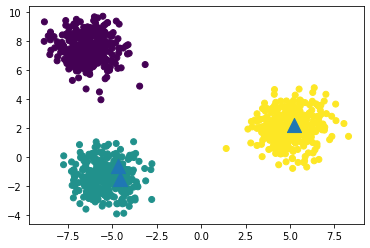

In [7]:
def vis_kmean(X, centroids, label=None):
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=label)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=200)

vis_kmean(X, np.array(centroids), label=y)

In [8]:
def get_clusters(X, K, centroids):
    clusters = [[] for i in range(K)]

    for sample_index, sample in enumerate(X):
        min_dist = np.inf
        min_index = 0

        for centroid_index, centroid in enumerate(centroids):
            dist = np.linalg.norm(sample - centroid)
            if(dist < min_dist):
                min_dist = dist
                min_index = centroid_index

        clusters[min_index].append(sample_index)
    
    return clusters

In [9]:
def get_new_centroids(X, clusters):
    new_centroids = []
    for cluster in clusters:
        new_centroids.append(X[cluster].mean(axis=0).tolist())

    return new_centroids

In [10]:
def is_converged(clusters, new_clusters):
    return all(sorted(i) == sorted(j) for i, j in zip(clusters, new_clusters))

In [11]:
from IPython.display import clear_output
import time

In [12]:
def get_labels(X, clusters):
    new_labels = np.zeros(X.shape[0])
    for cluster_index, cluster in enumerate(clusters):
        new_labels[cluster] = cluster_index
    return new_labels

break


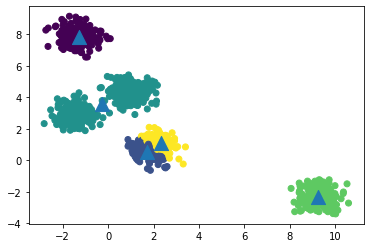

In [13]:
K = 5
X, y = make_blobs(n_samples=n_samples, n_features=n_features, cluster_std=0.5,
                  centers=K, random_state=0)

random_index = random.sample(range(X.shape[0]), K)
print(random_index)
centroids = X[random_index]
print(centroids)

new_clusters = None
for iter in range(100):
    clear_output(wait=True)
    clusters = get_clusters(X, K, centroids)

    new_centroids = get_new_centroids(X, clusters)

    if new_clusters is not None and is_converged(clusters, new_clusters):
        print("break")
        break

    centroids = new_centroids
    new_clusters = clusters
    new_labels = get_labels(X, new_clusters)
    time.sleep(2)
    vis_kmean(X, np.array(centroids), label=new_labels)
    plt.show();

vis_kmean(X, np.array(centroids), label=new_labels)

In [14]:
centroids

[[-1.2796120275523866, 7.864272955340542],
 [1.7050386801831607, 0.5468625637988063],
 [-0.2645310558267448, 3.6113231493468514],
 [9.25950949481238, -2.337593557271428],
 [2.32072794483772, 1.1398317048313285]]